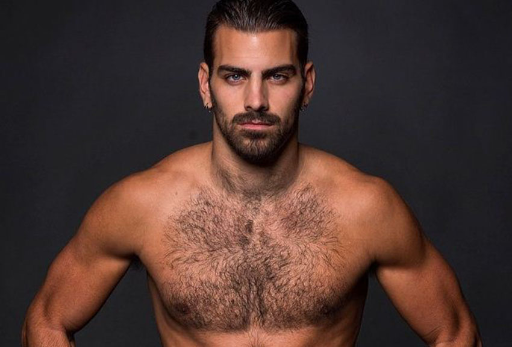

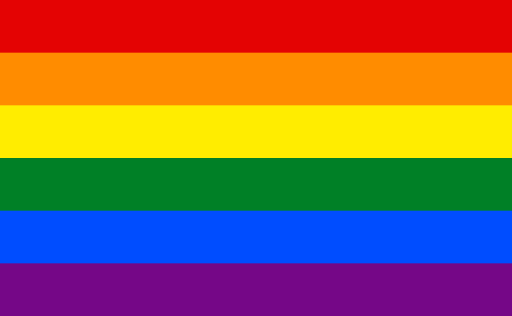

In [1]:
using Images

CONTENT_URL = "https://www.gaystarnews.com/wp-content/uploads/2015/10/Nyle_DiMarco.jpg"
STYLE_URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Gay_Pride_Flag.svg/512px-Gay_Pride_Flag.svg.png"

content_img = load(CONTENT_URL)
style_img = load(STYLE_URL)

ratio = 512 / max(size(content_img)...)
content_img = imresize(content_img, ratio=ratio)
ratio = 512 / max(size(style_img)...)
style_img = imresize(style_img, ratio=ratio)

display(content_img)
display(style_img)

┣                    ┫ [0.02%, 1/5000, 00:00/00:07, 696.04i/s] 

┌ Warning: k=(Ptr{Nothing} @0x00007eff15400000, 327680) v=55 ni=48
└ @ Knet /home/david.lin/.julia/packages/Knet/IIjk8/src/gcnode.jl:114


┣████████████████████┫ [100.00%, 5000/5000, 02:26/02:26, 34.27i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:20/02:20, 35.65i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:23/02:23, 35.07i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.74i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.73i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:23/02:23, 34.85i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:23/02:23, 34.85i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.79i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:2

Excessive output truncated after 524298 bytes.

┣█████████▍          ┫ 

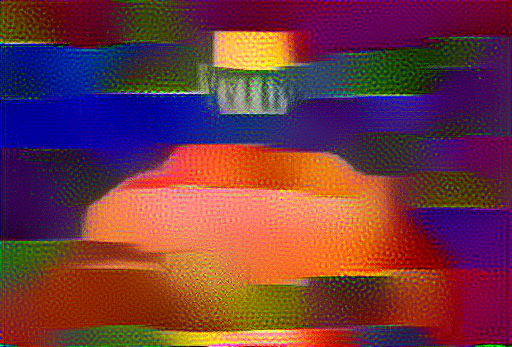

In [2]:
using StyleTransfer.Gatys2015
using Base.Iterators: take
using Printf

model = StyleTransfer(content_img, style_img)

losses= []
curr_img = content_img

mkpath("tmp/Gatys2015-pride/outputs")
for (i, (img, loss)) in take(enumerate(model(content_img)), 100)
    push!(losses, loss)
    curr_img = img
    save("tmp/Gatys2015-pride/outputs/$( @sprintf("%04d", i) ).png", map(clamp01nan, img))
end

display(curr_img)